In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("lsa64_dataset_best.csv")

In [3]:
df

,Unnamed: 0.1,Unnamed: 0,category,video_name,frame,hand_0_wrist_x,hand_0_wrist_y,hand_0_wrist_z,hand_0_thumb_cmc_x,hand_0_thumb_cmc_y,...,pose_left_heel_y,pose_left_heel_z,pose_right_foot_index_x,pose_right_foot_index_y,pose_right_foot_index_z,pose_left_foot_index_x,pose_left_foot_index_y,pose_left_foot_index_z,missing_hand,missing_face
0,23150,23150,5,005_001_001.mp4,0,0.420772,0.550836,1.636182e-07,0.443854,0.542178,...,1.827304,0.441803,0.538584,1.896927,0.008400,0.443128,1.888999,0.146504,False,False
1,23151,23151,5,005_001_001.mp4,1,0.421121,0.563831,1.745975e-07,0.440999,0.549937,...,1.824616,0.554366,0.534780,1.899688,0.126206,0.439994,1.889553,0.243100,False,False
2,23152,23152,5,005_001_001.mp4,2,0.420025,0.567050,1.688192e-07,0.440097,0.550066,...,1.828198,0.650777,0.546780,1.903675,0.207621,0.449782,1.897125,0.322711,False,False
3,23153,23153,5,005_001_001.mp4,3,0.419329,0.569760,1.583114e-07,0.440057,0.551531,...,1.828721,0.657948,0.549568,1.905399,0.212084,0.451675,1.900439,0.327484,False,False
4,23154,23154,5,005_001_001.mp4,4,0.418654,0.571615,1.575574e-07,0.439785,0.553101,...,1.829020,0.602851,0.554763,1.906695,0.182242,0.456765,1.902547,0.282989,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61615,18055,18055,3,003_010_005.mp4,113,0.425657,0.534980,1.647184e-07,0.441462,0.565812,...,1.912102,0.448031,0.470084,2.008406,-0.060018,0.377270,1.979426,0.118266,False,False
61616,18056,18056,3,003_010_005.mp4,114,0.425624,0.535997,1.647716e-07,0.441336,0.566124,...,1.911224,0.435046,0.468588,2.008240,-0.058428,0.375483,1.978823,0.112068,False,False
61617,18057,18057,3,003_010_005.mp4,115,0.424986,0.536302,1.625014e-07,0.440926,0.566188,...,1.911721,0.403390,0.467247,2.008238,-0.061164,0.372336,1.978815,0.085725,False,False
61618,18058,18058,3,003_010_005.mp4,116,0.424861,0.536518,1.643235e-07,0.441036,0.566482,...,1.910918,0.399239,0.466432,2.007564,-0.060832,0.371874,1.977763,0.078122,False,False


<Axes: >

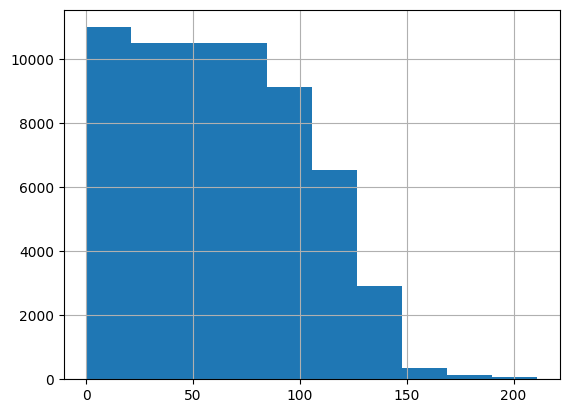

In [6]:
df["frame"].hist()

In [7]:
df.groupby("video_name")["frame"].max().min()

87

In [19]:
target_frames = 80

In [20]:
df_new_fps = pd.DataFrame(columns=df.columns)
for video_name in df["video_name"].unique():
    df_video = df[df["video_name"] == video_name]
    video_frames = df_video["frame"].max()
    frames_diff = video_frames - target_frames
    frames_to_remove = [i for i in range(0, video_frames, video_frames//(video_frames-target_frames))]
    frames_to_remove = frames_to_remove[(len(frames_to_remove) - frames_diff - 1):]
    new_df = df_video[~df_video["frame"].isin(frames_to_remove)]
    df_new_fps = pd.concat([df_new_fps, new_df])

In [21]:
df_new_fps

,Unnamed: 0.1,Unnamed: 0,category,video_name,frame,hand_0_wrist_x,hand_0_wrist_y,hand_0_wrist_z,hand_0_thumb_cmc_x,hand_0_thumb_cmc_y,...,pose_left_heel_y,pose_left_heel_z,pose_right_foot_index_x,pose_right_foot_index_y,pose_right_foot_index_z,pose_left_foot_index_x,pose_left_foot_index_y,pose_left_foot_index_z,missing_hand,missing_face
0,23150,23150,5,005_001_001.mp4,0,0.420772,0.550836,1.636182e-07,0.443854,0.542178,...,1.827304,0.441803,0.538584,1.896927,0.008400,0.443128,1.888999,0.146504,False,False
1,23151,23151,5,005_001_001.mp4,1,0.421121,0.563831,1.745975e-07,0.440999,0.549937,...,1.824616,0.554366,0.534780,1.899688,0.126206,0.439994,1.889553,0.243100,False,False
2,23152,23152,5,005_001_001.mp4,2,0.420025,0.567050,1.688192e-07,0.440097,0.550066,...,1.828198,0.650777,0.546780,1.903675,0.207621,0.449782,1.897125,0.322711,False,False
4,23154,23154,5,005_001_001.mp4,4,0.418654,0.571615,1.575574e-07,0.439785,0.553101,...,1.829020,0.602851,0.554763,1.906695,0.182242,0.456765,1.902547,0.282989,False,False
5,23155,23155,5,005_001_001.mp4,5,0.418795,0.572665,1.550393e-07,0.440197,0.553763,...,1.830195,0.615440,0.558402,1.907755,0.184645,0.459355,1.904403,0.283301,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61614,18054,18054,3,003_010_005.mp4,112,0.425919,0.534780,1.650426e-07,0.441723,0.565398,...,1.912443,0.435751,0.470073,2.008836,-0.060634,0.377210,1.979652,0.108757,False,False
61615,18055,18055,3,003_010_005.mp4,113,0.425657,0.534980,1.647184e-07,0.441462,0.565812,...,1.912102,0.448031,0.470084,2.008406,-0.060018,0.377270,1.979426,0.118266,False,False
61617,18057,18057,3,003_010_005.mp4,115,0.424986,0.536302,1.625014e-07,0.440926,0.566188,...,1.911721,0.403390,0.467247,2.008238,-0.061164,0.372336,1.978815,0.085725,False,False
61618,18058,18058,3,003_010_005.mp4,116,0.424861,0.536518,1.643235e-07,0.441036,0.566482,...,1.910918,0.399239,0.466432,2.007564,-0.060832,0.371874,1.977763,0.078122,False,False


In [22]:
df_new_fps.groupby("video_name")["frame"].count()

video_name
001_001_001.mp4    80
001_001_002.mp4    80
001_001_003.mp4    80
001_001_004.mp4    80
001_001_005.mp4    80
                   ..
030_010_001.mp4    80
030_010_002.mp4    80
030_010_003.mp4    80
030_010_004.mp4    80
030_010_005.mp4    80
Name: frame, Length: 500, dtype: int64

In [23]:
df_new_fps.to_csv(f"lsa64_dataset_best_{target_frames}_fps.csv")